# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from keras import initializers
from keras import optimizers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [2]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [5]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [6]:
xTrain.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
429,316,103,2,2.0,4.5,8.74,0
42,316,105,2,2.5,2.5,8.20,1
219,324,110,4,3.0,3.5,8.97,1
148,326,114,3,3.0,3.0,9.11,1
13,328,112,4,4.0,4.5,9.10,1


In [7]:
scaler = StandardScaler()
scaler.fit(X)

xTrain = pd.DataFrame(data = scaler.transform(xTrain), columns = xTrain.columns, index = xTrain.index)
xTest = pd.DataFrame(data = scaler.transform(xTest), columns = xTest.columns, index = xTest.index)

In [8]:
xTrain.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
429,-0.041830,-0.689952,-0.975168,-1.387862,1.098944,0.270702,-1.128152
42,-0.041830,-0.360777,-0.975168,-0.882817,-1.064332,-0.623031,0.886405
219,0.667148,0.462163,0.775582,-0.377773,0.017306,0.651365,0.886405
148,0.844393,1.120514,-0.099793,-0.377773,-0.523513,0.883074,0.886405
13,1.021637,0.791338,0.775582,0.632315,1.098944,0.866523,0.886405


In [9]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((350, 7), (150, 7), (350,), (150,))

In [10]:
yTrain = np.array(yTrain, ndmin=2).T
yTest = np.array(yTest, ndmin=2).T

In [11]:
xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((350, 7), (350, 1), (150, 7), (150, 1))

In [12]:
output_var = yTrain.shape[1]

In [13]:
learning_rate = 0.05
dims = xTrain.shape[1]

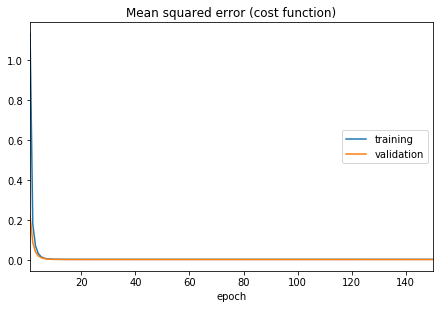

Mean squared error (cost function):
training   (min:    0.004, max:    1.133, cur:    0.004)
validation (min:    0.003, max:    0.224, cur:    0.003)


In [14]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr = learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(xTrain, yTrain,
          verbose=1, 
          epochs=150, 
          validation_data=[xTest, yTest],
          callbacks=[PlotLossesKeras()])

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

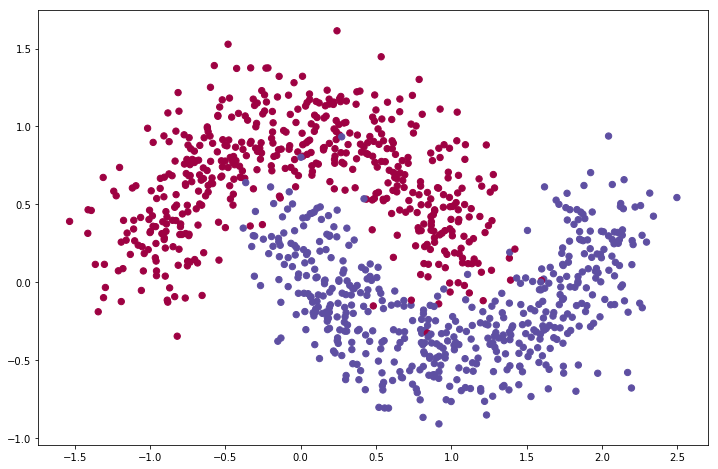

In [15]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [16]:
model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

In [17]:
x_train.shape, y_train.shape

((1000, 2), (1000,))

In [18]:
y_train = np.array(y_train, ndmin=2).T
x_train.shape, y_train.shape

((1000, 2), (1000, 1))

In [19]:
output_var = y_train.shape[1]
learning_rate = 0.05
dims = x_train.shape[1]

It is required to create the *test* set

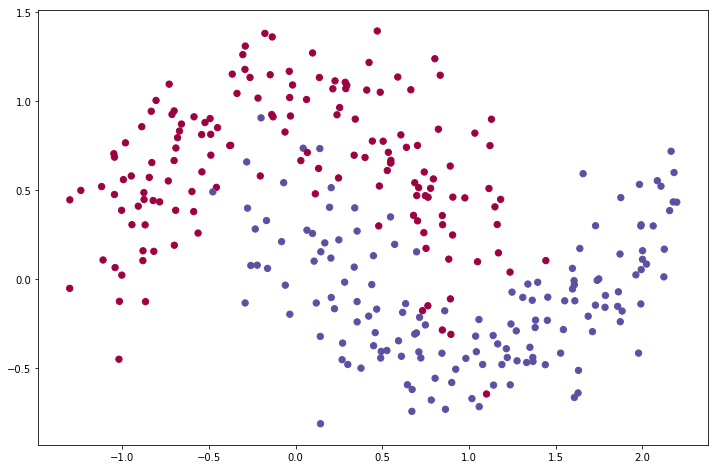

In [20]:
x_test, y_test = make_moons(n_samples=300, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_test[:, 0], x_test[:,1], c=y_test , s=40, cmap=plt.cm.Spectral);

In [21]:
pd.DataFrame(x_train).head()

,0,1
0,0.553569,-0.375962
1,0.981059,-0.284679
2,1.873453,0.436822
3,0.477478,0.808750
4,0.148796,-0.088704


In [22]:
pd.DataFrame(x_test).head()

,0,1
0,-0.216870,1.015449
1,0.805050,-0.557973
2,0.711275,-0.410060
3,2.108556,0.520815
4,0.907466,0.459349


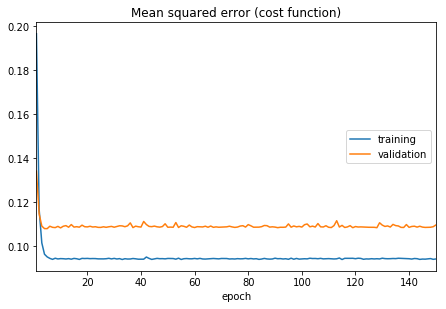

Mean squared error (cost function):
training   (min:    0.094, max:    0.196, cur:    0.094)
validation (min:    0.108, max:    0.134, cur:    0.110)


In [23]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr = learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(x_train, y_train,
          verbose=1, 
          epochs=150, 
          validation_data=[x_test, y_test],
          callbacks=[PlotLossesKeras()])

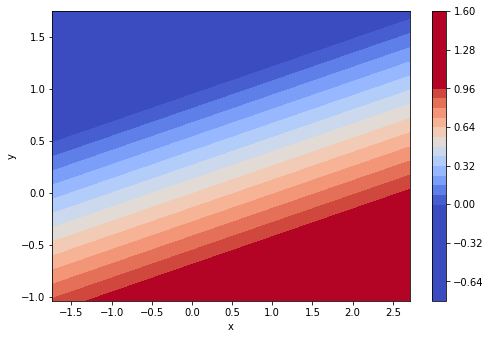

In [24]:
plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
